In [24]:
# !pip3 install opencv-python matplotlib

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# [plt.imshow(img),plt.imshow(img_grayscale),plt.imshow(img_rgb)]

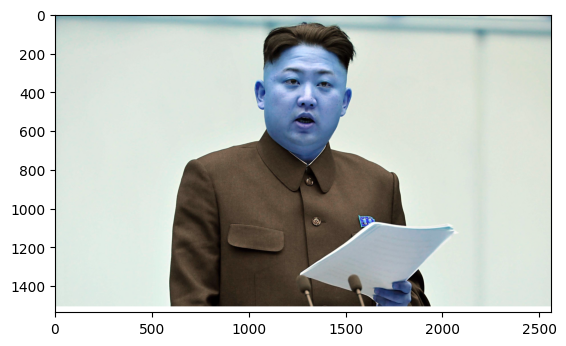

In [27]:
img = cv2.imread("Kim-Jong-un-014.jpg")
# img[img]
# print(len(img),len(img[1535]))
for i in range(1,30):
    img[len(img)-i]=255
plt.imshow(img)
plt.show()

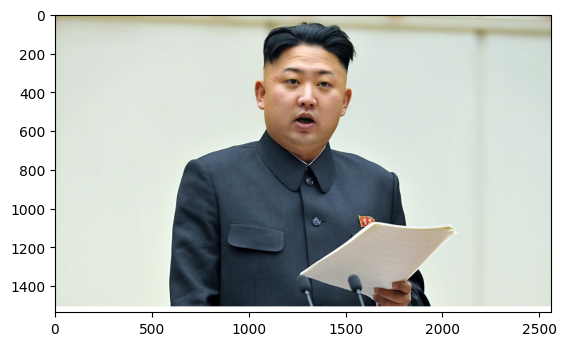

In [28]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [29]:
img_rgb[0][0]


array([170, 160, 111], dtype=uint8)

In [30]:
channels = cv2.split(img_rgb)
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


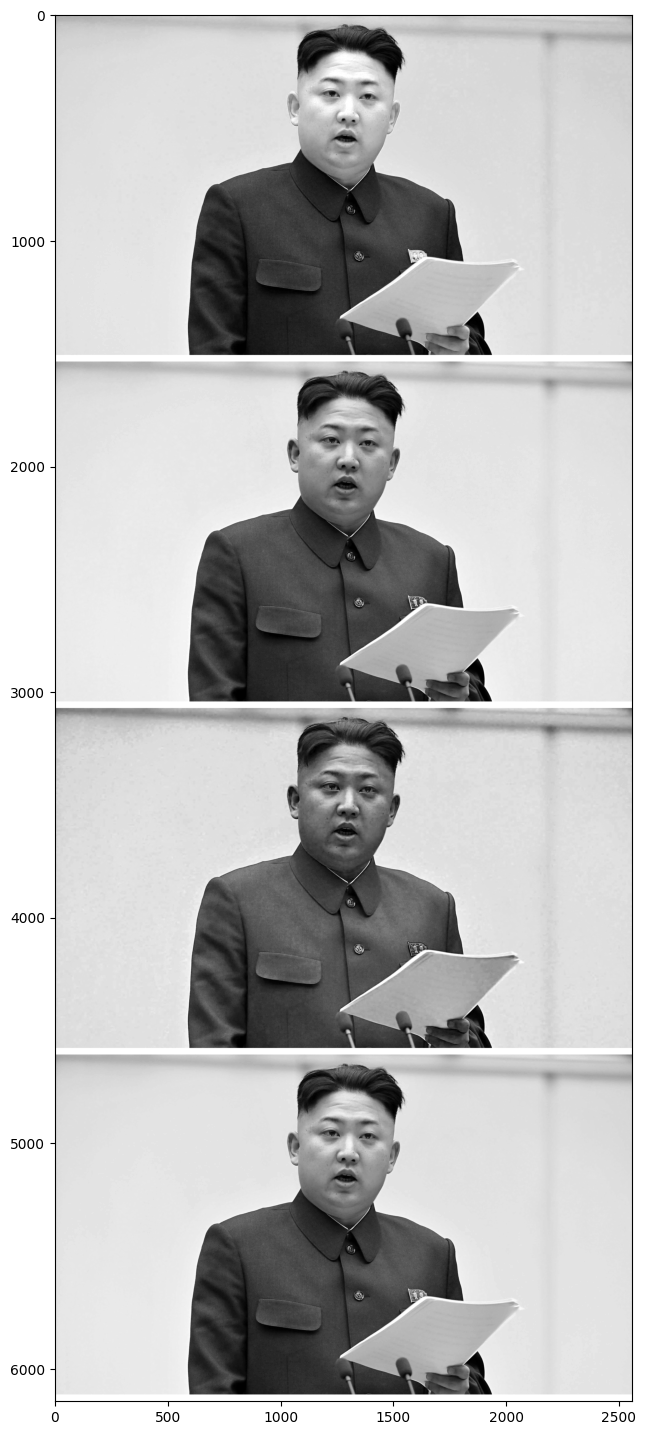

In [31]:
plt.figure(figsize=(24,18)) 
plt.imshow(np.vstack([channels[0],channels[1],channels[2],img_grayscale]),cmap='grey')
plt.show()

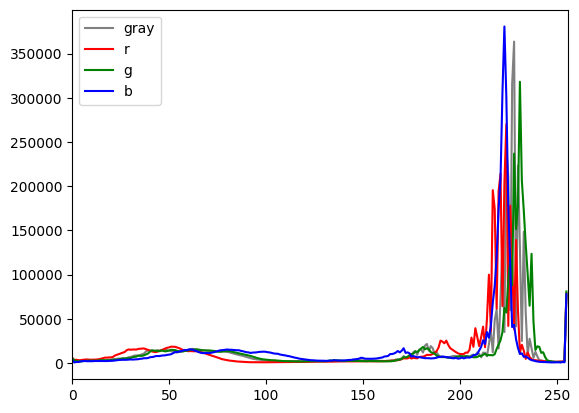

In [32]:
plt.plot(cv2.calcHist([img_grayscale],[0],None, [256], [0,256]),label = "gray" ,color = "gray")
# plt.show()
colors = ("r", "g", "b")
for (chan, color) in zip(channels, colors):
    # cv2.calcHist(images,channels,mask,histSize,ranges)
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color,label = color)
    plt.xlim([0, 256])
plt.legend(loc="upper left")
plt.show()


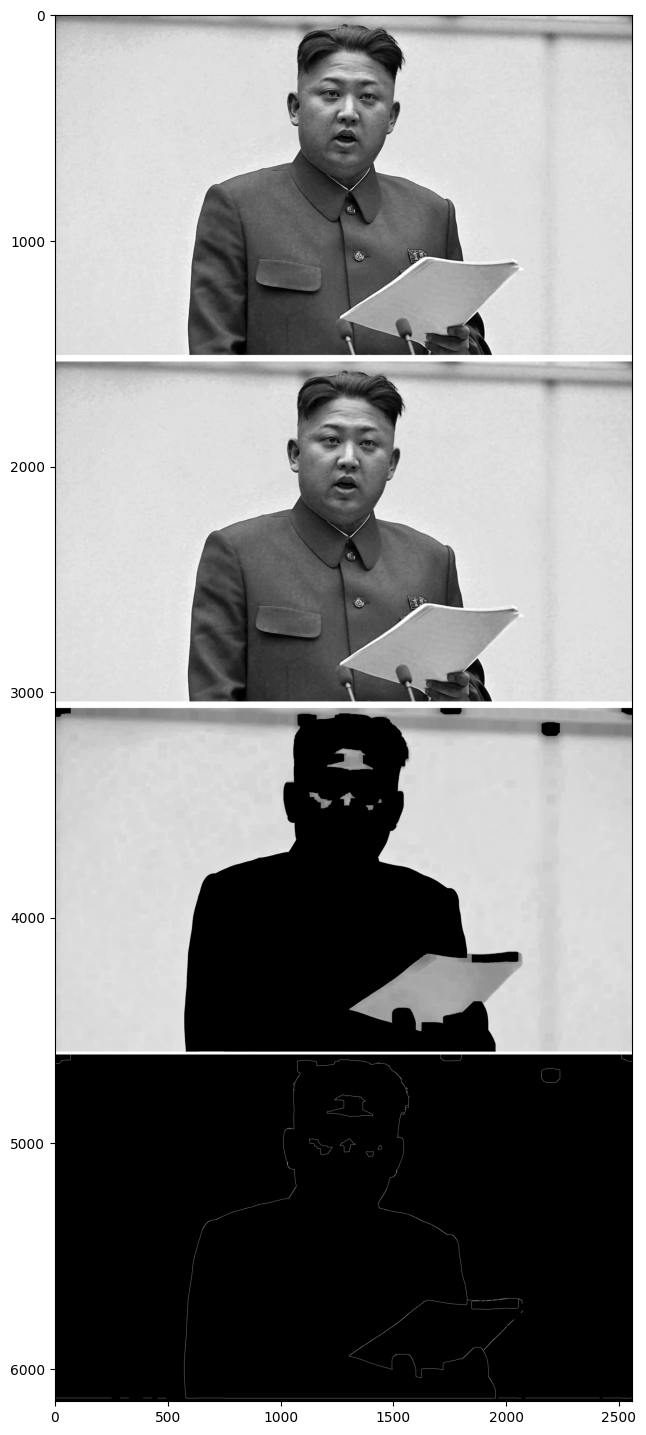

In [33]:
# # blurred = cv2.GaussianBlur(channels[1], (25,25),0)
# # edged = cv2.Canny(blurred,100,114)
# # plt.figure(figsize=(24,18)) 
# # plt.imshow(np.vstack([channels[0], blurred, edged]),cmap="gray")

# blurred = cv2.GaussianBlur(channels[2], (15,13),0)
# edged = cv2.Canny(blurred,57,165)
plt.figure(figsize=(24,18)) 
# plt.imshow(np.vstack([channels[2], blurred, edged]),cmap="gray")



blurred = cv2.GaussianBlur(channels[2], (3,3),0)
thresh = cv2.erode(blurred, None, iterations=17)
thresh = cv2.dilate(thresh, None, iterations=1)

thresh = cv2.threshold(thresh, 120, 255, cv2.THRESH_TOZERO)[1]

# thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY_INV)[1]

edged = cv2.Canny(thresh,100,100)
# plt.imshow(thresh,cmap='gray')
plt.imshow(np.vstack([channels[2], blurred,thresh,edged]),cmap="gray")


In [34]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
cnts = max(cnts, key=cv2.contourArea)
# r = 0
# t = 0
# for i,j in enumerate(cnts):
#     k = len(j)
#     if  k > t:
#         t = k
#         r = i
# cnts = cnts[r]
# cnts

In [35]:
# cnts[5]

In [36]:
# cnts

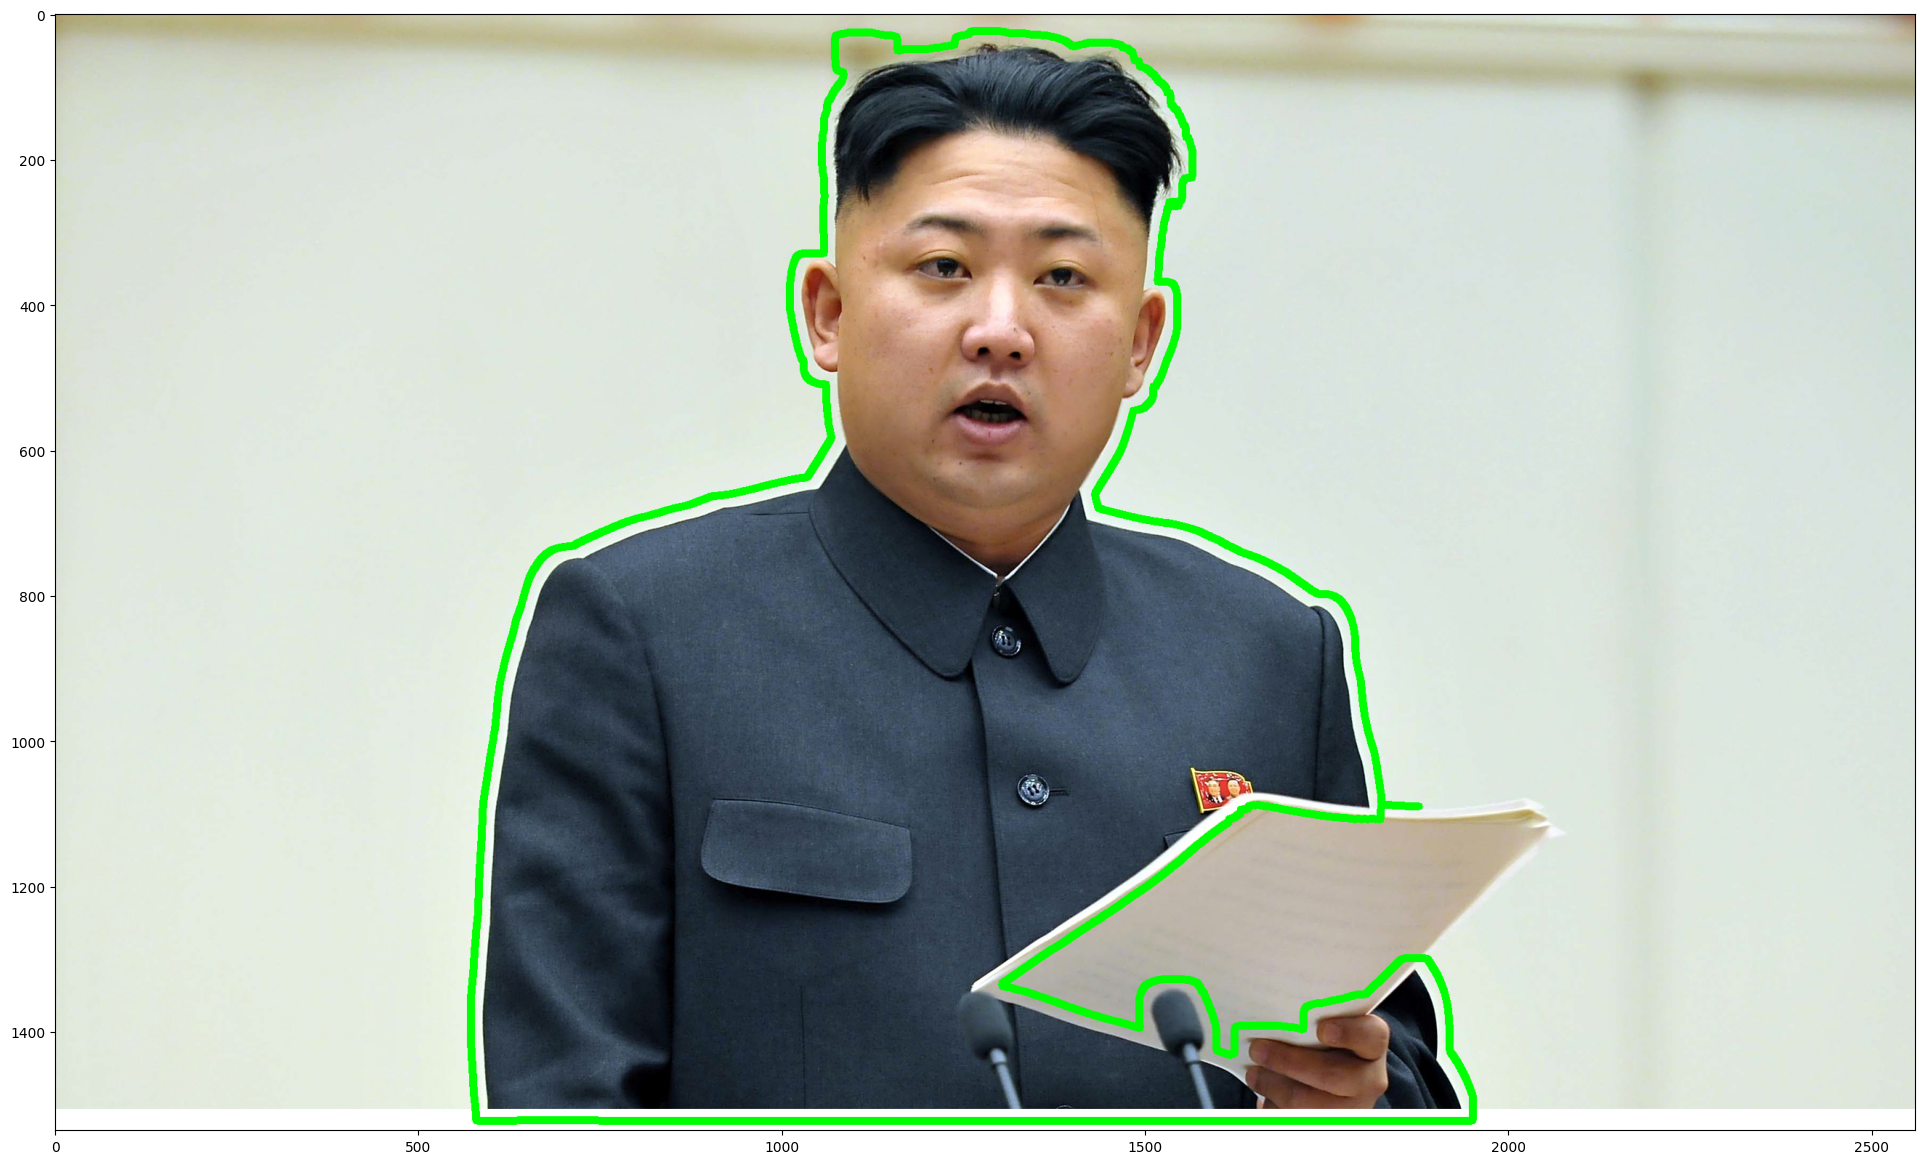

In [37]:
black =np.zeros_like(img_grayscale)

img2 = img_rgb.copy()
cv2.drawContours(img2, [cnts], -1, (0, 255, 0), 10)
plt.figure(figsize=(24,18)) 
# plt.imshow(np.hstack([img_rgb]))
plt.imshow(img2)
plt.show()

In [38]:
# img3 = channels[2].copy()
# thresh = cv2.threshold(img3, 160, 255, cv2.THRESH_BINARY)[1]

# edged = cv2.Canny(img3,100,100)
# plt.imshow(edged,cmap='gray')


In [39]:
# plt.imshow(img_rgb - img2)
black =np.zeros_like(img_grayscale)
# plt.imshow(black,cmap='gray')


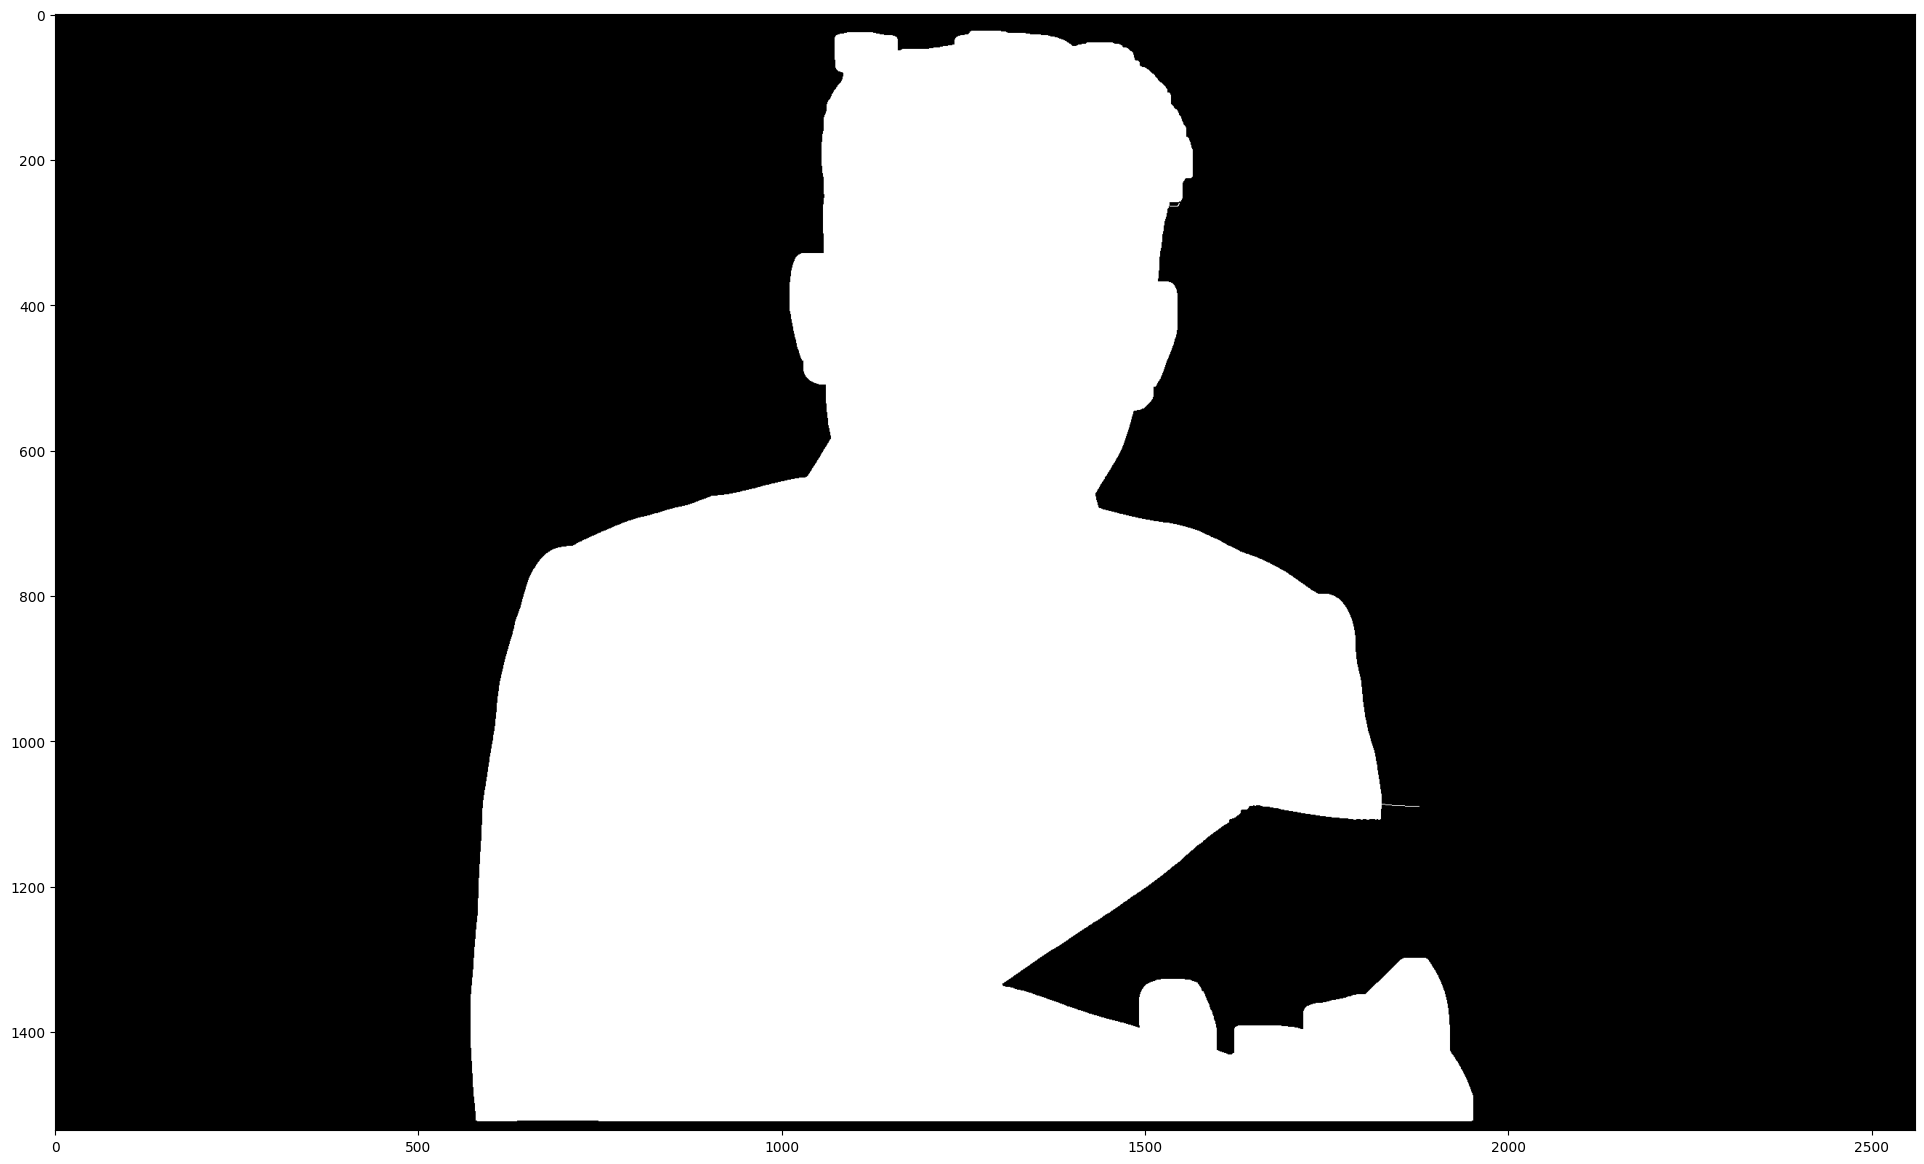

In [40]:
plt.figure(figsize=(24,18)) 

mask = cv2.fillPoly(black.copy(),[cnts],color = 255)
plt.imshow(mask,cmap='gray')
# cv2.imshow('',mask)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

In [41]:
# cv2.bitwise_and(img_grayscale,)

In [42]:
# black = True
# for i,j in enumerate(mask):
#     for k,l in enumerate(j):
#         if (l != 0 and black ==True):
#             black = False
#         elif (l != 0 and black ==False):
#             black = True
#         elif (black == False and l==0):
#             mask[i][k]=255



In [43]:
# plt.imshow(mask,cmap='gray')
# 
# mask[]

In [44]:
for i,y in enumerate(mask):
    for j,x in enumerate(y):
        if x!=255:
            img_rgb[i][j]=[255,255,255]

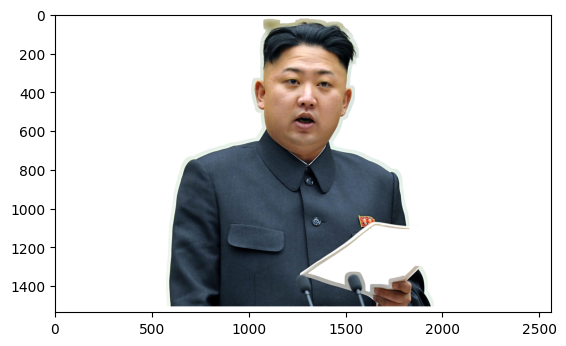

In [45]:
plt.imshow(img_rgb)


In [46]:
# mask.tolist()